In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3,NaN,1.0,1.0,2.0,1.0,2.0,NaN,1.0
679,2,1.0,1.0,1.0,NaN,1.0,3.0,1.0,1.0
680,5,10.0,10.0,10.0,4.0,10.0,5.0,6.0,NaN
681,1,1.0,NaN,3.0,2.0,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	50
float64		column 3	48
float64		column 4	16
float64		column 5	32
float64		column 6	16
float64		column 7	34
float64		column 8	64
float64		column 9	32


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,633.000000,635.000000,667.000000,651.000000,667.000000,649.000000,619.000000,651.000000
mean,4.442167,3.028436,3.192126,2.857571,3.193548,3.517241,3.409861,2.786753,1.551459
std,2.820761,2.942349,2.959922,2.883491,2.168875,3.629325,2.407222,2.970146,1.635673
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,5.000000,4.000000,4.000000,6.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

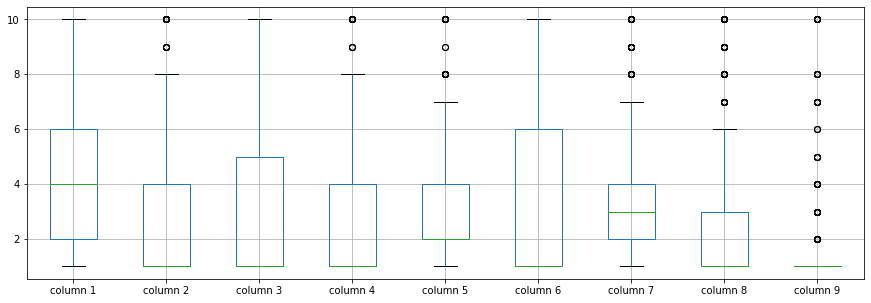

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.028436
column 3    3.192126
column 4    2.857571
column 5    3.193548
column 6    3.517241
column 7    3.409861
column 8    2.786753
column 9    1.551459
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.653958,0.647171,0.486602,0.534051,0.600718,0.547821,0.515242,0.335159
column 2,0.653958,1.000000,0.909184,0.697673,0.751437,0.709514,0.740952,0.711319,0.445740
column 3,0.647171,0.909184,1.000000,0.688927,0.732071,0.705080,0.736717,0.727916,0.438399
column 4,0.486602,0.697673,0.688927,1.000000,0.585326,0.674154,0.655082,0.585064,0.426825
column 5,0.534051,0.751437,0.732071,0.585326,1.000000,0.583671,0.601349,0.628745,0.456909
column 6,0.600718,0.709514,0.705080,0.674154,0.583671,1.000000,0.677386,0.592888,0.338104
column 7,0.547821,0.740952,0.736717,0.655082,0.601349,0.677386,1.000000,0.615680,0.328812
column 8,0.515242,0.711319,0.727916,0.585064,0.628745,0.592888,0.615680,1.000000,0.442446
column 9,0.335159,0.445740,0.438399,0.426825,0.456909,0.338104,0.328812,0.442446,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+5,9+5+5,9+5+5,9+5+5+5+5,9+5+5+5+5+5,9+5+5+5+5+5+5,9+5+5+5+5+5,9+5+5+5+5,9+5+5+5,9+5+5,9+5,9], vae_layer = False, seed = 50)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 34.68696081070673
Epoch: 1 , loss: 34.73205116816929
Epoch: 2 , loss: 34.6079044342041
Epoch: 3 , loss: 34.79288273765927
Epoch: 4 , loss: 34.439614613850914
Epoch: 5 , loss: 34.45031293233236
Epoch: 6 , loss: 34.40913999648321
Epoch: 7 , loss: 34.180009796505885
Epoch: 8 , loss: 34.42793419247582
Epoch: 9 , loss: 34.10997186388288
Epoch: 10 , loss: 34.1538014184861
Epoch: 11 , loss: 34.129169282459074
Epoch: 12 , loss: 33.728693280901226
Epoch: 13 , loss: 32.40790367126465
Epoch: 14 , loss: 31.039056187584286
Epoch: 15 , loss: 29.880664144243514
Epoch: 16 , loss: 29.109181812831334
Epoch: 17 , loss: 28.889742306300572
Epoch: 18 , loss: 28.305450303213938
Epoch: 19 , loss: 27.999173346019926
Epoch: 20 , loss: 27.78117883773077
Epoch: 21 , loss: 28.021271251496813
Epoch: 22 , loss: 28.021554560888383
Epoch: 23 , loss: 27.821610223679315
Epoch: 24 , loss: 28.14057817913237
Epoch: 25 , loss: 28.32275215784

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.00000
column 2    1.00000
column 3    1.00000
column 4    0.08761
column 5    2.00000
column 6    1.00000
column 7    2.00000
column 8    1.00000
column 9    1.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
678,0,-0.910464,0.000000,0.0,0.000000,0.0,0.0,-0.909319,0.000000
679,0,0.000000,0.000000,0.0,-1.927499,0.0,0.0,0.000000,0.000000
680,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,-2.926074
681,0,0.000000,-0.911569,0.0,0.000000,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(86.4656428705712, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.2578537788651422

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.000000,1.000000,1.0,2.000000,1.0,3.0,1.000000,1.000000
1,5,4.000000,4.000000,5.0,7.000000,10.0,3.0,2.000000,1.000000
2,3,1.000000,1.000000,1.0,2.000000,2.0,3.0,1.000000,1.000000
3,6,8.000000,8.000000,1.0,3.000000,4.0,3.0,7.000000,1.000000
4,4,1.000000,1.000000,3.0,2.000000,1.0,3.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
678,3,0.089536,1.000000,1.0,2.000000,1.0,2.0,0.090681,1.000000
679,2,1.000000,1.000000,1.0,0.072501,1.0,3.0,1.000000,1.000000
680,5,10.000000,10.000000,10.0,4.000000,10.0,5.0,6.000000,0.073926
681,1,1.000000,0.088431,3.0,2.000000,1.0,1.0,1.000000,1.000000


In [20]:
imputations[-1].to_excel("BCW_NN_5(imp).xlsx", index=False, header=False)